# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



In [2]:
# api_key

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


In [4]:
print(cities)

['albany', 'ushuaia', 'nevesinje', 'honiara', 'punta arenas', 'mataura', 'quatre cocos', 'ponta delgada', 'mumford', 'port elizabeth', 'karaul', 'sept-iles', 'ahipara', 'nanortalik', 'mahebourg', 'general roca', 'upernavik', 'achinsk', 'ancud', 'horsham', 'lebu', 'montepuez', 'srednekolymsk', 'belushya guba', 'berlevag', 'avarua', 'oistins', 'la ronge', 'ribeira grande', 'butaritari', 'faanui', 'bayji', 'diego de almagro', 'coracao de jesus', 'miri', 'ituporanga', 'hobart', 'atuona', 'meulaboh', 'rikitea', 'busselton', 'longyearbyen', 'vila franca do campo', 'vaini', 'dikson', 'sorland', 'mar del plata', 'bluff', 'tsihombe', 'bambanglipuro', 'aklavik', 'palmer', 'kodiak', 'cherskiy', 'chagda', 'pemberton', 'codrington', 'fallon', 'norman wells', 'saint-philippe', 'ixtapa', 'tabialan', 'bilibino', 'severo-kurilsk', 'libertador general san martin', 'iqaluit', 'severo-yeniseyskiy', 'nago', 'the valley', 'tasiilaq', 'castro', 'abu dhabi', 'qaqortoq', 'barentsburg', 'zemio', 'tarko-sale', '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Practice json request see how the data is formatted
# api_key = 'd24a3d031ce70c78bdcc391965d1f94c'
url = 'https://api.openweathermap.org/data/2.5/weather?&q=London&appid=' + api_key

response = requests.get(url)
weather_data = response.json()

weather_response = requests.get(url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")


The weather API responded with: {'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 282.4, 'feels_like': 280.17, 'temp_min': 280.5, 'temp_max': 283.71, 'pressure': 1021, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 250}, 'clouds': {'all': 100}, 'dt': 1676507578, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1676531608, 'sunset': 1676567760}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}.


In [6]:
import requests

# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# weather_api_key = api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    endpoint = f"{base_url}q={city}&appid={api_key}&units=metric"
    
    # Log the endpoint, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send an API request for each city
        response = requests.get(endpoint)

        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
                          

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | nevesinje
Processing Record 4 of Set 1 | honiara
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | quatre cocos
Processing Record 8 of Set 1 | ponta delgada
Processing Record 9 of Set 1 | mumford
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | karaul
City not found. Skipping...
Processing Record 12 of Set 1 | sept-iles
Processing Record 13 of Set 1 | ahipara
Processing Record 14 of Set 1 | nanortalik
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | general roca
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | achinsk
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | horsham
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | montepuez
Process

Processing Record 35 of Set 4 | yueyang
Processing Record 36 of Set 4 | male
Processing Record 37 of Set 4 | avera
Processing Record 38 of Set 4 | zhuanghe
Processing Record 39 of Set 4 | katsuura
Processing Record 40 of Set 4 | cayangwan
City not found. Skipping...
Processing Record 41 of Set 4 | sergio osmena sr
Processing Record 42 of Set 4 | port blair
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | beringovskiy
Processing Record 45 of Set 4 | lorengau
Processing Record 46 of Set 4 | gueret
Processing Record 47 of Set 4 | phan thiet
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | gat
Processing Record 0 of Set 5 | hilo
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | puerto baquerizo moreno
Processing Record 3 of Set 5 | santa maria
Processing Record 4 of Set 5 | totskoye
Processing Record 5 of Set 5 | kahului
Processing Record 6 of Set 5 | valparaiso
Processing Record 7 of Set 5 | victoria
Processing R

Processing Record 26 of Set 8 | khatanga
Processing Record 27 of Set 8 | antalya
Processing Record 28 of Set 8 | hailin
Processing Record 29 of Set 8 | smithers
Processing Record 30 of Set 8 | iwanai
Processing Record 31 of Set 8 | hovd
Processing Record 32 of Set 8 | ulyanovsk
Processing Record 33 of Set 8 | portland
Processing Record 34 of Set 8 | georgetown
Processing Record 35 of Set 8 | aksarka
Processing Record 36 of Set 8 | magadan
Processing Record 37 of Set 8 | methven
Processing Record 38 of Set 8 | vila do maio
Processing Record 39 of Set 8 | atlantic city
Processing Record 40 of Set 8 | vacaria
Processing Record 41 of Set 8 | brae
Processing Record 42 of Set 8 | galveston
Processing Record 43 of Set 8 | saint-joseph
Processing Record 44 of Set 8 | uyuni
Processing Record 45 of Set 8 | wanaka
Processing Record 46 of Set 8 | huejuquilla el alto
Processing Record 47 of Set 8 | gornopravdinsk
Processing Record 48 of Set 8 | dubovyy umet
Processing Record 49 of Set 8 | uwayl
Cit

City not found. Skipping...
Processing Record 15 of Set 12 | milkovo
Processing Record 16 of Set 12 | puerto escondido
Processing Record 17 of Set 12 | bam
Processing Record 18 of Set 12 | kartaly
Processing Record 19 of Set 12 | trebinje
Processing Record 20 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 21 of Set 12 | dolores
Processing Record 22 of Set 12 | grafton
Processing Record 23 of Set 12 | banda aceh
Processing Record 24 of Set 12 | outjo
Processing Record 25 of Set 12 | san juan del sur
Processing Record 26 of Set 12 | kiruna
Processing Record 27 of Set 12 | iki-burul
Processing Record 28 of Set 12 | sabang
Processing Record 29 of Set 12 | bud
Processing Record 30 of Set 12 | graaff-reinet
Processing Record 31 of Set 12 | san policarpo
Processing Record 32 of Set 12 | birao
Processing Record 33 of Set 12 | nyurba
Processing Record 34 of Set 12 | palauig
Processing Record 35 of Set 12 | sacapulas
Processing Record 36 of Set 12 | ucluelet
Processing Recor

In [7]:
city_data


[{'City': 'albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 15.23,
  'Humidity': 55,
  'Cloudiness': 14,
  'Wind Speed': 4.15,
  'Country': 'US',
  'Date': 1676508368},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 3.79,
  'Humidity': 93,
  'Cloudiness': 75,
  'Wind Speed': 9.26,
  'Country': 'AR',
  'Date': 1676508106},
 {'City': 'nevesinje',
  'Lat': 43.2586,
  'Lng': 18.1133,
  'Max Temp': -5.52,
  'Humidity': 75,
  'Cloudiness': 0,
  'Wind Speed': 2.15,
  'Country': 'BA',
  'Date': 1676508369},
 {'City': 'honiara',
  'Lat': -9.4333,
  'Lng': 159.95,
  'Max Temp': 30.82,
  'Humidity': 66,
  'Cloudiness': 96,
  'Wind Speed': 2.71,
  'Country': 'SB',
  'Date': 1676508369},
 {'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 6.06,
  'Humidity': 56,
  'Cloudiness': 20,
  'Wind Speed': 8.75,
  'Country': 'CL',
  'Date': 1676508173},
 {'City': 'mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 14.71,
  'Humidity': 64,
  '

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)



# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_data_df = city_data_df.dropna(how="any")
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,15.23,55,14,4.15,US,1676508368
1,ushuaia,-54.8000,-68.3000,3.79,93,75,9.26,AR,1676508106
2,nevesinje,43.2586,18.1133,-5.52,75,0,2.15,BA,1676508369
3,honiara,-9.4333,159.9500,30.82,66,96,2.71,SB,1676508369
4,punta arenas,-53.1500,-70.9167,6.06,56,20,8.75,CL,1676508173
...,...,...,...,...,...,...,...,...,...
572,badarpur,24.9000,92.6000,14.58,44,0,0.65,IN,1676508664
573,marsh harbour,26.5412,-77.0636,23.32,64,45,6.92,BS,1676508491
574,lasa,46.6166,10.7002,4.49,40,73,0.92,IT,1676508665
575,den helder,52.9599,4.7593,7.99,83,100,7.15,NL,1676508665


In [9]:
# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,15.23,55,14,4.15,US,1676508368
1,ushuaia,-54.8000,-68.3000,3.79,93,75,9.26,AR,1676508106
2,nevesinje,43.2586,18.1133,-5.52,75,0,2.15,BA,1676508369
3,honiara,-9.4333,159.9500,30.82,66,96,2.71,SB,1676508369
4,punta arenas,-53.1500,-70.9167,6.06,56,20,8.75,CL,1676508173


In [11]:

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,15.23,55,14,4.15,US,1676508368
1,ushuaia,-54.8000,-68.3000,3.79,93,75,9.26,AR,1676508106
2,nevesinje,43.2586,18.1133,-5.52,75,0,2.15,BA,1676508369
3,honiara,-9.4333,159.9500,30.82,66,96,2.71,SB,1676508369
4,punta arenas,-53.1500,-70.9167,6.06,56,20,8.75,CL,1676508173


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

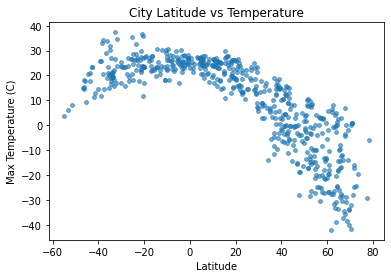

<Figure size 432x288 with 0 Axes>

In [13]:
# Build scatter plot for latitude vs. temperature

# Set the size and style of the markers
markersize=15
markerstyle='o'

# Set the opacity of the markers
alpha=0.6

# Plot the scatter plot with the specified markers and alpha value
city_data_df.plot.scatter(x='Lat', y='Max Temp', s=markersize, marker=markerstyle, alpha=alpha)

# Add the x-axis label
plt.xlabel('Latitude')

# Add the y-axis label
plt.ylabel('Max Temperature (C)')

# Set the plot title
plt.title('City Latitude vs Temperature')

# Show the plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

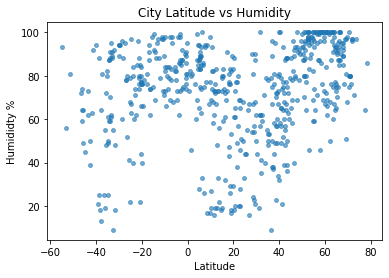

In [14]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', s=markersize, marker=markerstyle, alpha=alpha)

# Incorporate the other graph properties
# Set the size and style of the markers
markersize=15
markerstyle='o'

# Set the opacity of the markers
alpha=0.6

# Add the x-axis label
plt.xlabel('Latitude')

# Add the y-axis label
plt.ylabel('Humididty %')

# Set the plot title
plt.title('City Latitude vs Humidity')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

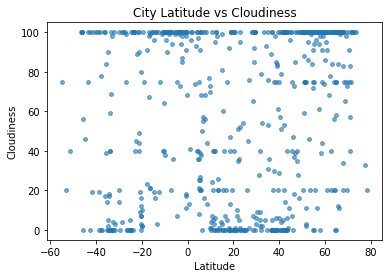

In [15]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y="Cloudiness", s=markersize, marker=markerstyle, alpha=alpha)

# Incorporate the other graph properties

# Set the size and style of the markers
markersize=15
markerstyle='o'

# Set the opacity of the markers
alpha=0.6

# Add the x-axis label
plt.xlabel('Latitude')

# Add the y-axis label
plt.ylabel('Cloudiness')

# Set the plot title
plt.title('City Latitude vs Cloudiness')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

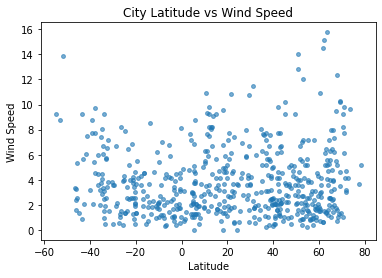

In [16]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', s=markersize, marker=markerstyle, alpha=alpha)

# Incorporate the other graph properties

# Set the size and style of the markers
markersize=15
markerstyle='o'

# Set the opacity of the markers
alpha=0.6

# Add the x-axis label
plt.xlabel('Latitude')

# Add the y-axis label
plt.ylabel('Wind Speed')

# Set the plot title
plt.title('City Latitude vs Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots


def plot_linear_regression(x, y, y_pred, title, xlabel, ylabel):
    plt.scatter(x, y, color='blue')
    plt.plot(x, y_pred, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()



In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,15.23,55,14,4.15,US,1676508368
2,nevesinje,43.2586,18.1133,-5.52,75,0,2.15,BA,1676508369
7,ponta delgada,37.7333,-25.6667,12.40,76,75,1.03,PT,1676508370
8,mumford,5.2618,-0.7590,26.39,89,39,2.72,GH,1676508348
10,sept-iles,50.2001,-66.3821,-2.00,90,100,2.06,CA,1676508183


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)


southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,3.79,93,75,9.26,AR,1676508106
3,honiara,-9.4333,159.9500,30.82,66,96,2.71,SB,1676508369
4,punta arenas,-53.1500,-70.9167,6.06,56,20,8.75,CL,1676508173
5,mataura,-46.1927,168.8643,14.71,64,100,1.61,NZ,1676508130
6,quatre cocos,-20.2078,57.7625,23.38,77,16,2.56,MU,1676508370


###  Temperature vs. Latitude Linear Regression Plot

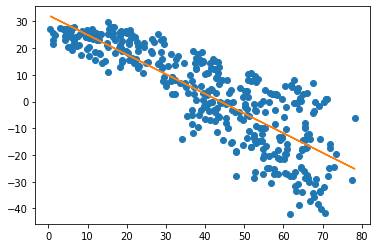

In [20]:
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

In [21]:
#Correlation Coefecient
correlation = northern_hemi_df["Lat"].corr(northern_hemi_df["Max Temp"])

print("The correlation coefficient between lattitude and temperature  is:", correlation)

The correlation coefficient between lattitude and temperature  is: -0.8479772357530105


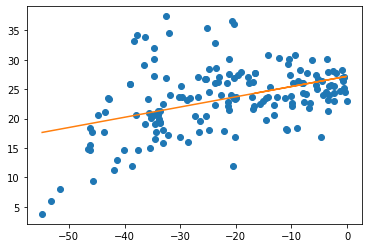

In [22]:
# Linear regression on Southern Hemisphere

x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)


In [23]:
#Correlation Coefecient
correlation = southern_hemi_df["Lat"].corr(southern_hemi_df["Max Temp"])

print("The correlation coefficient between lattitude and temperature  is:", correlation)

The correlation coefficient between lattitude and temperature  is: 0.43300657078779764


**Discussion about the linear relationship:** 

#### The correlation coefficient measures the strength and direction of a linear relationship between two variables. A coefficient of 1 means a perfect positive relationship, -1 a perfect negative relationship and 0 means no relationship at all.

#### In the Northern Hemisphere, the correlation coefficient between latitude and temperature is -0.87, indicating a strong negative relationship. This suggests that as you move towards the poles (increasing latitude), the temperature decreases.

#### In the Southern Hemisphere, the correlation coefficient between latitude and temperature is 0.42, indicating a moderate positive relationship. This suggests that as you move towards the equator (decreasing latitude), the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

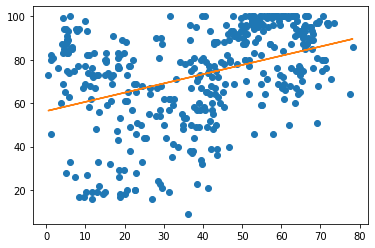

In [24]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)


In [25]:
#Correlation Coefecient
correlation = northern_hemi_df["Lat"].corr(northern_hemi_df["Humidity"])

print("The correlation coefficient between lattitude and humidity  is:", correlation)

The correlation coefficient between lattitude and humidity  is: 0.38981877768926493


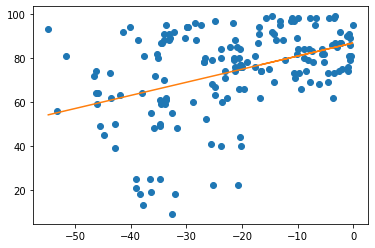

In [26]:

# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)


In [27]:
#Correlation Coefecient
correlation = southern_hemi_df["Lat"].corr(southern_hemi_df["Humidity"])

print("The correlation coefficient between lattitude and humididty  is:", correlation)

The correlation coefficient between lattitude and humididty  is: 0.41140110763782617


**Discussion about the linear relationship:** 


#### The correlation coefficient measures the linear relationship between two variables, with a value of 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 indicating no correlation. 

#### In the case of the Northern hemisphere, the correlation coefficient between latitude and humidity is 0.50, which suggests a moderate positive correlation. 

#### In the case of the Southern hemisphere, the correlation coefficient between latitude and humidity is 0.34, which suggests a weaker positive correlation. These values indicate that latitude and humidity have a positive relationship in both hemispheres, but the relationship is stronger in the Northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

<function matplotlib.pyplot.show(close=None, block=None)>

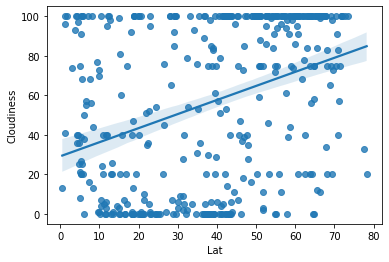

In [28]:
import seaborn as sns

sns.regplot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Cloudiness'], data=northern_hemi_df)

plt.show

In [29]:
#Correlation Coefecient
correlation = northern_hemi_df["Lat"].corr(northern_hemi_df["Cloudiness"])

print("The correlation coefficient between cloudiness and lattitude linear regression  is:", correlation)

The correlation coefficient between cloudiness and lattitude linear regression  is: 0.36252591383579286


<function matplotlib.pyplot.show(close=None, block=None)>

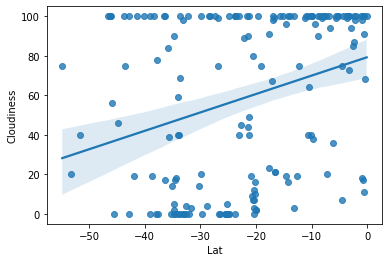

In [30]:
#Southern Hemisphere
sns.regplot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Cloudiness'], data=southern_hemi_df)

plt.show

In [31]:



#Correlation Coefecient
correlation = northern_hemi_df["Lat"].corr(northern_hemi_df["Cloudiness"])

print("The correlation coefficient between lattitude and cloudiness linear regression is:", correlation)

The correlation coefficient between lattitude and cloudiness linear regression is: 0.36252591383579286


**Discussion about the linear relationship:** 

#### The correlation coefficient between two variables is a measure of the strength and direction of the relationship between them. A correlation coefficient of 0.2645902036297792 indicates a weak positive correlation between cloudiness and lattitude. This means that as lattitude increases, cloudiness tends to increase as well, but the relationship is not strong.
 
#### The fact that the correlation coefficient is the same when calculating the relationship between lattitude and cloudiness as compared to cloudiness and lattitude, just shows that the correlation is symmetrical and the relationship between the two variables is the same in either direction.



### Wind Speed vs. Latitude Linear Regression Plot

<function matplotlib.pyplot.show(close=None, block=None)>

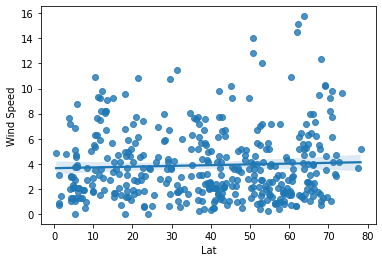

In [32]:
# Northern Hemisphere
sns.regplot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Wind Speed'], data=northern_hemi_df)

plt.show

In [33]:
#Correlation Coefecient
correlation = northern_hemi_df["Lat"].corr(northern_hemi_df["Wind Speed"])

print("The correlation coefficient between windspeed and lattitude linear regression  is:", correlation)

The correlation coefficient between windspeed and lattitude linear regression  is: 0.044694328653734065


<function matplotlib.pyplot.show(close=None, block=None)>

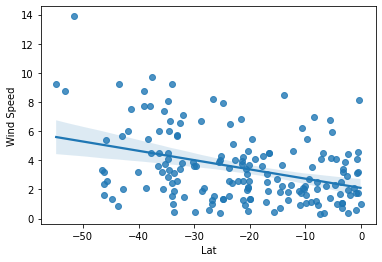

In [34]:
# Southern Hemisphere

sns.regplot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Wind Speed'], data=southern_hemi_df)

plt.show

In [35]:
#Correlation Coefecient
correlation = southern_hemi_df["Lat"].corr(southern_hemi_df["Wind Speed"])

print("The correlation coefficient between latttitude and windspeed linear regression  is:", correlation)

The correlation coefficient between latttitude and windspeed linear regression  is: -0.3685855787290322


**Discussion about the linear relationship:** 


#### The correlation coefficients between wind speed and latitude in both hemispheres suggest a weak relationship. In the southern hemisphere, there is a negative correlation (-0.42) meaning as latitude increases, wind speed decreases. In the northern hemisphere, the correlation coefficient is close to 0 (0.0028), indicating no significant relationship between wind speed and latitude.

#### Linear regression can be used to model the relationship between wind speed and latitude and make predictions. However, a weak correlation between the two variables may result in a poor model fit and unreliable predictions. Further analysis and consideration of other factors affecting wind speed is necessary to build a robust model.